In [1]:
#imported packages
import numpy as np 
import time
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#created a deta set with "years" as X and "salary" as y
#there is a linear relationship between X and y

years = np.arange(0,40,0.5)
np.random.seed(0)
salary = 45000+np.sqrt(years)*16789 +np.random.normal(2000,10000,len(years))


In [17]:
y=np.array(salary)


X_original= np.array(years)

#Created a ones vector
ones = np.ones((X_original.shape[0],1))


#converted X_original to a nX2 matrix, n is the number samples, and the first column of X_original is 1
#add ones to the first vector/column in X_original 
X = np.reshape(X_original, (X_original.shape[0],1))
X = np.concatenate((ones,X),axis=1)

print(X.shape)
print(X[0:3, :])
print(X_original.shape)

(80L, 2L)
[[ 1.   0. ]
 [ 1.   0.5]
 [ 1.   1. ]]
(80L,)


In [ ]:
#In the above cell, I gave X_original since in Vectorized_update_theta function,
#under gradient[1] multiplication------error(theta,X,y) is in order of 80*1. So, X_original has dimension of 80*1
#Whereas X has dimension of 80*2 which would result in error for the above function and the optimum never gets executed.

##This is the most important step in vectorization assignment.

In [24]:
# error = y_i - y_hat_i
def error(theta, X, y):
    return y - (X.dot(theta))  #np.dot() multiplication

# SSE (sum squared error)
def vectorized_calculate_SSE(theta):
    
    return sum(error(theta, X, y)**2 )
   

def vectorized_update_theta(theta, gamma):
    gradient=[0,0]
    
    
    gradient=[0,0]
    gradient[0] = -2*sum(error(theta, X, y) )
    gradient[1] = -2*sum(error(theta, X, y)*X_original) #multiplication of matrices with same dimensions [80*1]

    return  [theta[0]-gamma*gradient[0], theta[1]-gamma*gradient[1]]

def vectorized_adaptive_optimum(theta, gamma, t, precision):
    #infinite loop if no "return" is executed 
    while True:
        #decrease gamma in every iteration
        gamma *=t
        
        #store SSE 
        old_SSE = vectorized_calculate_SSE(theta)
        
        #update theta for a small number of time
        for i in range(10):
            temp_theta =vectorized_update_theta(theta, gamma) 
        
        #get the new SSE
        new_SSE = vectorized_calculate_SSE(temp_theta)
        
        # if SSE is thrinking, go to the next iteration and try a smaller gamma
        if new_SSE > old_SSE:  
            continue
        
        # if SEE does converge
        else:
            # try a large iteration to see if gamma can be found
            for i in range(100000):
                
                #update theta and calculate new SSE
                theta =vectorized_update_theta(theta, gamma) 
                new_SSE = vectorized_calculate_SSE(theta)
                
                #if the update is within the prcision 
                if abs(old_SSE - new_SSE) < precision:
                    
                    #print out the result and return to the function call
                    print("found minimum cost:", new_SSE)
                    print("the optimum theta:", theta)
                    print("the learning rate is:", gamma)
                    return theta

In [29]:
#initiate theta
init_theta=[1,1]

#start from a large learning rate
gamma = 1

#the decrease rate of gamma 
t=0.9

#the precision for stopping the search. 1 unit is a $1
precision =1

#print out the time used for computing
start_time = time.time()

#call the vectorized function

theta = vectorized_adaptive_optimum(init_theta,gamma,t,precision)
print("the calculation takes ", time.time()-start_time, " seconds.")

('found minimum cost:', 7684735996.8480816)
('the optimum theta:', [79958.203991839677, 1864.8714513134084])
('the learning rate is:', 3.986723479010574e-06)
('the calculation takes ', 9.020999908447266, ' seconds.')


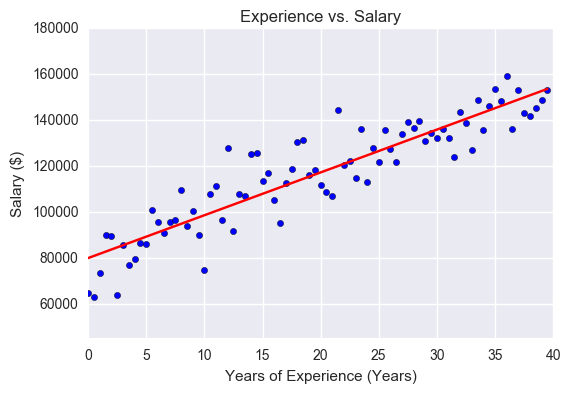

In [38]:
#plot the prediction line

plt.title("Experience vs. Salary")
plt.xlabel('Years of Experience (Years)')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.xlim(0,40)
plt.ylim(45000,180000)
plt.scatter(years, salary)

y_hat = X.dot(theta)  #y_hat is the linear regression line with respect to years
plt.plot(years,y_hat, color='red')
 

In [ ]:
#Thus, the above cell fulfills the assignment.